In [1]:
import pandas as pd

In [2]:
import ipywidgets as widgets

In [3]:
import random

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

sp = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id="5557699cab004eada3d85f41912ff424",
                                                           client_secret="d5d356cde05b4e3ba453e89944f8ff20"))

# Retrieving Track Data

In [7]:
track_data = pd.read_csv('track_data/tracks_features.csv')

# Pie Chart
## Explicit vs Clean music

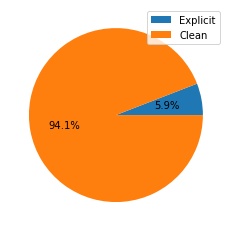

In [8]:
slices = [len(track_data.explicit[track_data.explicit == True]), len(track_data.explicit[track_data.explicit == False])]
labels = ['Explicit', 'Clean']

plt.pie(slices, labels=labels, labeldistance=None, autopct='%1.1f%%')
plt.legend(loc='best')
plt.show()

# Box Plots
## Spread of Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence

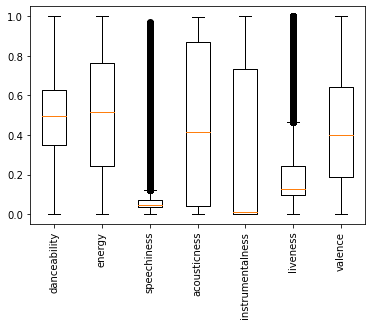

In [9]:
fig, ax = plt.subplots()
ax.boxplot(track_data[track_data.columns[7:]], labels=track_data.columns[7:])
plt.xticks(rotation='vertical')
plt.show()

# Hex Binning
## Visualization of Valence(Positivity) to Danceability of Songs


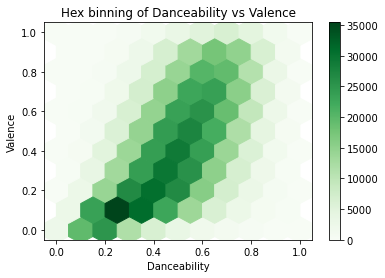

In [10]:
plt.hexbin(track_data.danceability, track_data.valence, gridsize=10, cmap='Greens')
plt.title('Hex binning of Danceability vs Valence')
plt.ylabel('Valence')
plt.xlabel('Danceability')
plt.colorbar()
plt.show()

# Interactive Song Recommendation System

In [11]:
# Core Recommendation Algorithm
def get_recommended_songs(sliders_vector, rand_ints):
    try:
        potential_songs = []
        for index in rand_ints:
            track_vector = list(track_data.iloc[index][7:])
            angle = cosine_similarity([sliders_vector],[track_vector])[0][0]
            potential_songs.append([angle, index])
    
        potential_songs.sort(reverse=True, key=lambda x: x[0])
        return potential_songs
    except IndexError as err:
        file = open("log.txt", 'a')
        file.write(f'Index Error at {index}')
        file.close()
    except ValueError as err:
        file = open("log.txt", 'a')
        file.write(f'Value Error at {index}')
        file.close()

In [12]:
def get_random_indicies():
    rand_ints = []
    length = len(track_data)-1
    for x in range(10**5):
        rand_ints.append(random.randint(0,length))
    return rand_ints

The following is a list of what each value represents:

-	Danceability: How suitable the song is for dancing 
-	Energy: Intensity and Activity 
-	Speechiness: How much of the song is speech-like
-	Acousticness: Confidence whether the track is acoustic
-	Instrumentalness: Level of vocal content in the song
-	Liveness: Confidence whether the track was performed live based on audience sounds
-	Valence: Positivity of track 

In [13]:
# Initialize Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence Sliders
danceability_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Danceability')
energy_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Energy')
speechiness_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Speechiness')
acousticness_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Acousticness')
instrumentalness_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Instrumentalness')
liveness_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Liveness')
valence_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, orientation='vertical', description='Valence')

# Create Slider container
sliders = [danceability_slider, energy_slider, speechiness_slider, acousticness_slider, instrumentalness_slider, liveness_slider, valence_slider]
hb_sliders = widgets.HBox(sliders)
hb_sliders.layout.justify_content = 'space-around'

# Initalize Buttons
submit_button = widgets.Button(description='Get Song Recommendations')
submit_button.layout.width = '25%'
reset_button = widgets.Button(description='Reset Sliders')
reset_button.layout.width = '25%'
output = widgets.Output()


def handle_submit(e):
    with output:
        output.clear_output()
        slider_values = []
        for slider in sliders:
            slider_values.append(slider.value)

        print('Calculating recommended songs ')
        print('This may take a moment...')

        # Call method to get song recommendation
        rand_ints = get_random_indicies()
        recommended_songs = get_recommended_songs(slider_values, rand_ints)
        
        for x in range(5):
            track = sp.track(track_data.iloc[recommended_songs[x][1]]["id"])
            print(  
                    f'\n-----------------Recommendation #{x+1}-----------------',
                    f'\nTitle - {track_data.iloc[recommended_songs[x][1]]["name"]}', 
                    f'\nAlbum - {track_data.iloc[recommended_songs[x][1]]["album"]}',
                    f'\nArtists - {track_data.iloc[recommended_songs[x][1]]["artists"]}',
                    f'\nSpotify URL - {track["external_urls"]["spotify"]}',
                    f'\nSlider Vector - {slider_values}',
                    f'\nTrack Vector - {list(track_data.iloc[x][7:])}',
                    f'\nSimilarity Score - {recommended_songs[x][0]:.5f}',
                    '\n---------------------------------------------------'
            )

        
# The reset_sliders method sets the values of all sliders to their intital value 0.50
def reset_sliders(e):
    for slider in sliders:
        slider.value = 0.50

        
# Connect event listener for buttons to described method 
submit_button.on_click(handle_submit)
reset_button.on_click(reset_sliders)

# Create container for buttons
buttons = [submit_button, reset_button]
hb_buttons = widgets.HBox(buttons)

# Create VB for containing containers and output
items = [hb_sliders, hb_buttons , output]
vb = widgets.VBox(items)
vb
